In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/05dec18/SalishSea_1h_20181205_20181205_grid_W.nc')

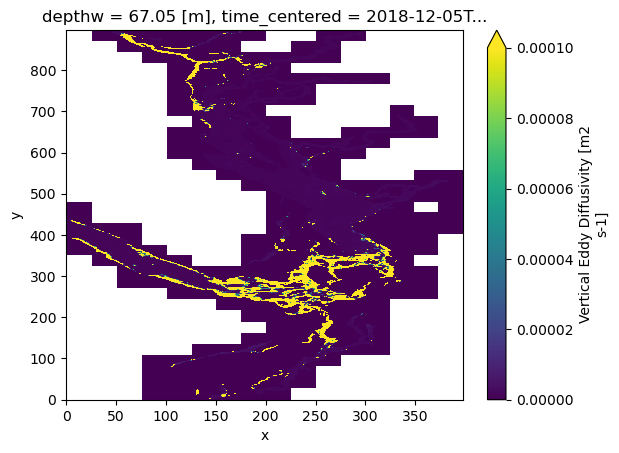

In [3]:
data.vert_eddy_diff[0, 25].plot(vmax=1e-4);

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


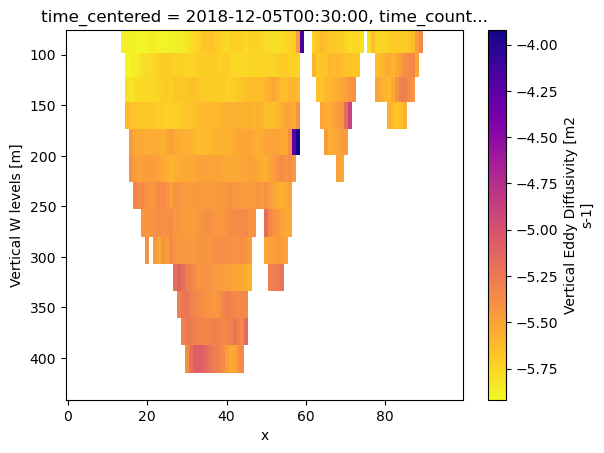

In [4]:
np.log10(data.vert_eddy_diff[0, 26:, 500, 200:300]).plot(y='depthw', yincrease=False, cmap='plasma_r');

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


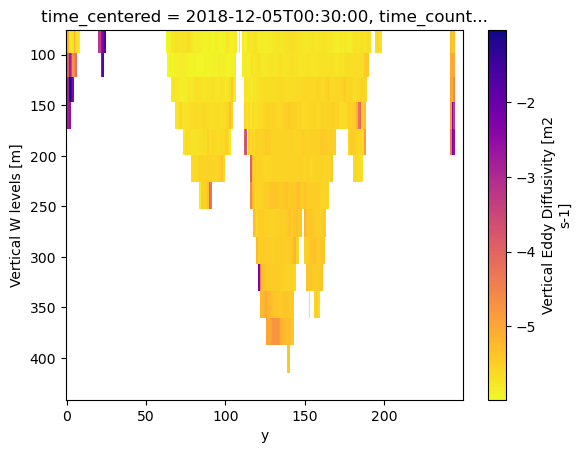

In [5]:
np.log10(data.vert_eddy_diff[0, 26:, 350:600, 250]).plot(y='depthw', yincrease=False, cmap='plasma_r');

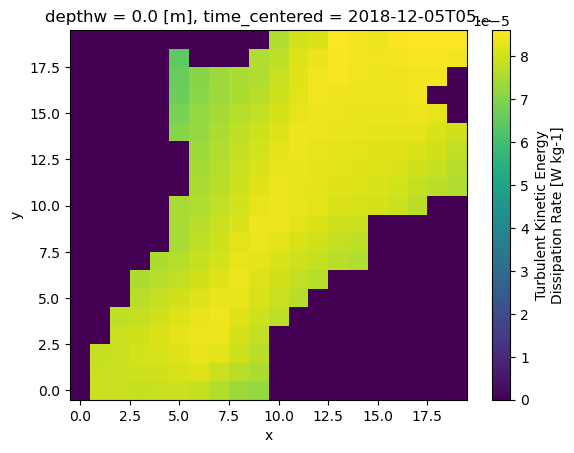

In [6]:
data.dissipation[5, 0, 340:360, 195:215].plot()

239.65305


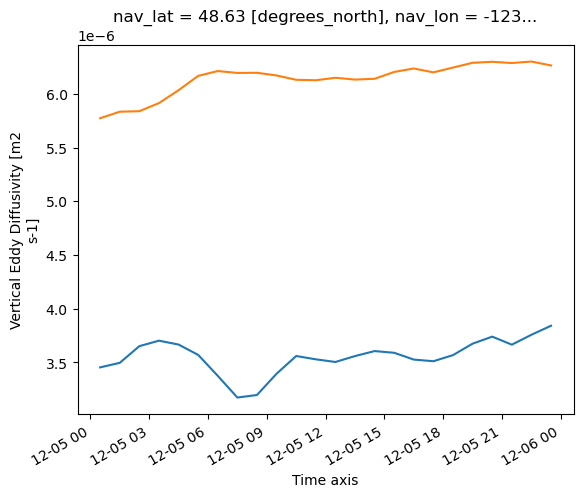

In [7]:
data.vert_eddy_diff[:, 32, 500, 235].plot()
data.vert_eddy_diff[:, 28, 350, 205].plot()
print (data.depthw[32].values)

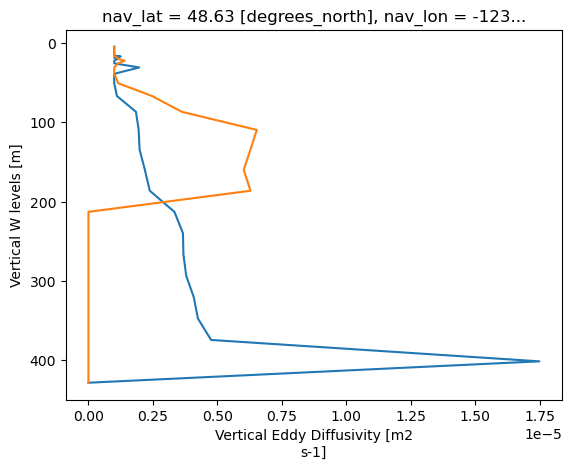

In [8]:
data.vert_eddy_diff[21, 5:, 500, 235].plot(y='depthw', yincrease=False)
data.vert_eddy_diff[21, 5:, 350, 205].plot(y='depthw', yincrease=False)

In [9]:
data2 = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01mar21/SalishSea_1h_20210301_20210301_grid_W.nc')

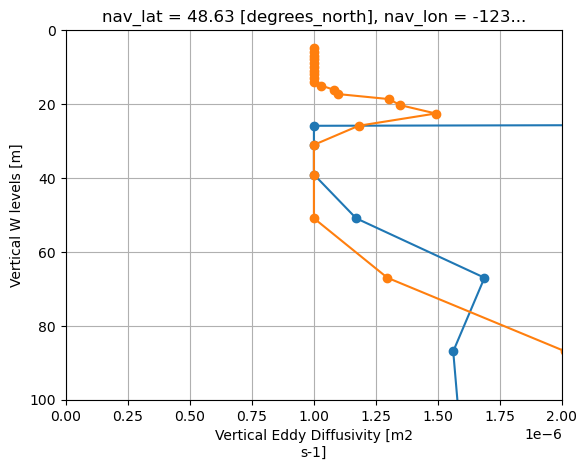

In [138]:
data2.vert_eddy_diff[21, 5:, 500, 235].plot(y='depthw', yincrease=False, marker='o')
data2.vert_eddy_diff[21, 5:, 350, 205].plot(y='depthw', yincrease=False, marker='o')
plt.xlim((0, 2e-6))
plt.ylim((100, 0))
plt.grid();

In [11]:
profile = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20151201_20151231.nc')

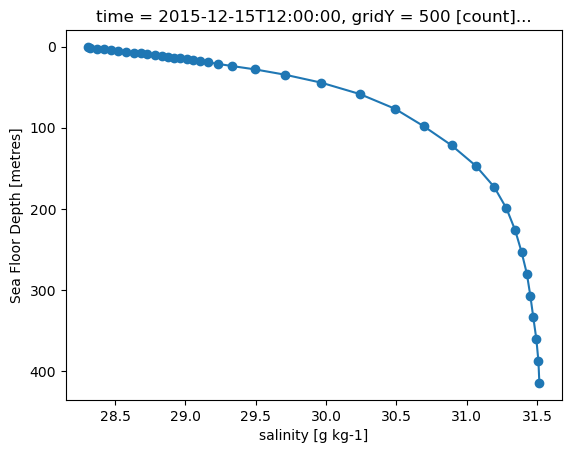

In [12]:
profile.vosaline[0, :-1, 500, 235].plot(y='depth', yincrease=False, marker='o')

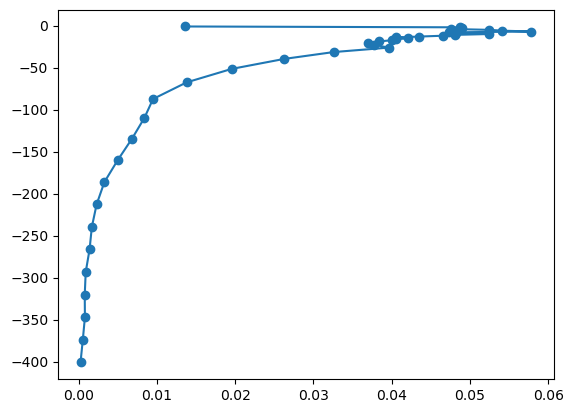

In [13]:
dSdz = (
    (np.array(profile.vosaline[0, 1:-1, 500, 235]) - np.array(profile.vosaline[0, 0:-2, 500, 235])) /
     (np.array(profile.depth[1:-1]) - np.array(profile.depth[0:-2]))
    )
Sdepth = (np.array(profile.depth[1:-1]) + np.array(profile.depth[0:-2]))/2

plt.plot(dSdz, -Sdepth, 'o-')

In [14]:
print(Sdepth[31], dSdz[31])

239.66347 0.0016965698


In [15]:
profile.depth[-2].values

array(414.5341, dtype=float32)

Flux = K * dS/dz
Flux = Z * dS/dt  where Z = profile.depth[-2] - Sdepth[31]
might what to consider hysography say 2/3?

In [16]:
Z = profile.depth[-2].values - Sdepth[31]

In [17]:
Z

174.87062

From Allen et al plot 2 salinity units in 2.5 years OBS

In [18]:
dSdt = 2 / (2.5 * 365 * 86400)
dSdt_obs = dSdt
print (dSdt)
print (dSdt * 86400)

2.536783358701167e-08
0.002191780821917808


In [19]:
Flux2 = Z * 0.67 * dSdt

In [20]:
kappa = Flux2/(dSdz[31])
kappa

0.0017518757088332746

Model 3.2 years and 1 salinity unit

In [21]:
dSdt = 1 / (3.2 * 365 * 86400)
print (dSdt, dSdt_obs/dSdt)
print (dSdt*86400)

9.909309994926434e-09 2.5599999999999996
0.0008561643835616439


In [22]:
Flux2 = Z * 0.67 * dSdt

In [23]:
kappa = Flux2/(dSdz[31])
kappa

0.0006843264487629979

Try as curvature

In [24]:
d2Sdz2 = (
    (np.array(profile.vosaline[0, 2:-1, 500, 235]) -2 *  np.array(profile.vosaline[0, 1:-2, 500, 235]) 
    + np.array(profile.vosaline[0, 0:-3, 500, 235])) /
     (np.array(profile.depth[2:-1]) - np.array(profile.depth[1:-2]) ) /
    (np.array(profile.depth[1:-2]) - np.array(profile.depth[0:-3]) )
    )

In [25]:
kappa = 0.67 * dSdt / d2Sdz2
kappa

array([ 1.8900536e-07,  2.1756050e-05, -4.6538485e-06,  1.3593482e-06,
        3.9076403e-06,  1.7840766e-06, -6.3060543e-07,  7.2348012e-06,
        1.5643386e-06, -1.5895030e-06, -5.0251570e-06, -2.4568469e-06,
       -3.1200088e-06,  2.5878990e-06,  8.5805123e-06,  2.2054794e-06,
        1.8299303e-06,  1.3390137e-06,  1.0861680e-06,  1.2085414e-06,
        3.7910677e-06,  8.7874778e-06,  6.1131963e-05, -7.1796552e-05,
       -5.6799559e-05, -7.6771085e-04, -1.4441001e-04, -1.0336763e-04,
       -1.0629158e-04, -1.8248320e-04, -2.9673174e-04, -6.1932532e-04,
       -3.6370638e-04, -1.4426210e-03,  7.8830374e-03, -6.6188356e-04,
       -6.1315863e-04], dtype=float32)

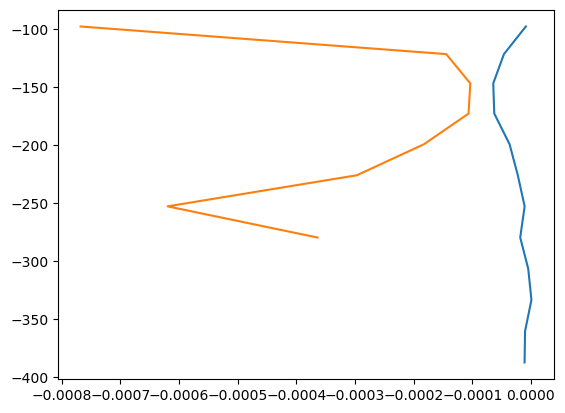

In [26]:
plt.plot(d2Sdz2[25:], -profile.depth[25+1:-2])
plt.plot(kappa[25:-4], -profile.depth[25+1:-4-2])

In [27]:
print (d2Sdz2[30], profile.depth[31].values)

-2.2374545e-05 226.2603


In [28]:
print (dSdt / d2Sdz2[30], profile.depth[31].values)

-0.0004428832029213422 226.2603


In [29]:
dSdt

9.909309994926434e-09

Back to Diffusivity in Model

In [30]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = np.array(mesh.tmask[0])
e3t = mesh.e3t_0[0]

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


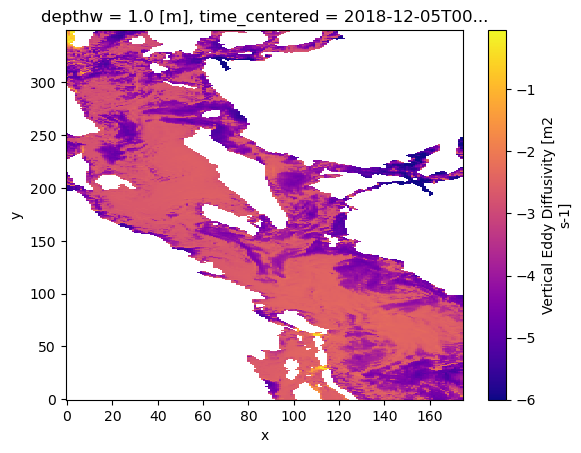

In [31]:
np.log10(data.vert_eddy_diff[0, 1, 400:750, 125:300]).plot(cmap='plasma');

In [32]:
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[21, :, 400:600, 125:300], mask=1- tmask[:, 400:600, 125:300])

212.89656
0.0004021318017045416


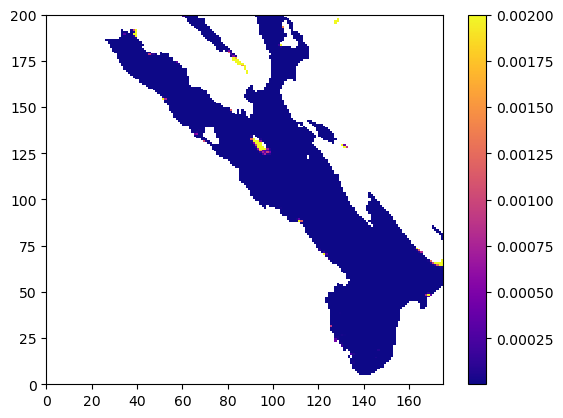

In [33]:
kk = 31
print(data.depthw[kk].values)
colours = plt.pcolormesh((masked_vert_K[kk]), cmap='plasma', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

In [34]:
print (tmask.shape)
tmaskt = np.repeat(tmask[None,...], 24, axis=0)
print(tmaskt.shape)
masked_vert_Kt = np.ma.masked_array(data.vert_eddy_diff[:, :, 400:600, 125:300], mask=1- tmaskt[:, :, 400:600, 125:300])


(40, 898, 398)
(24, 40, 898, 398)


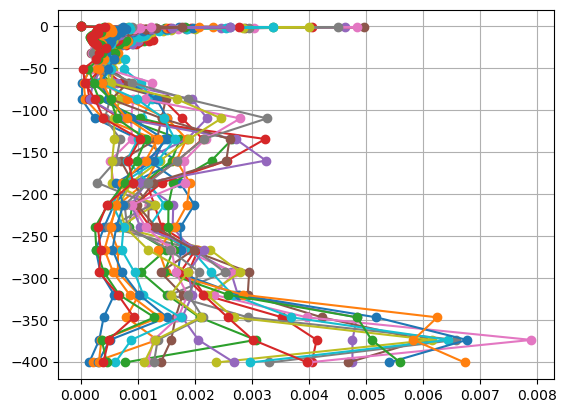

In [35]:
for tt in range(24):
    plt.plot(masked_vert_Kt[tt].mean(axis=1).mean(axis=1), -data.depthw, 'o-')
plt.grid();

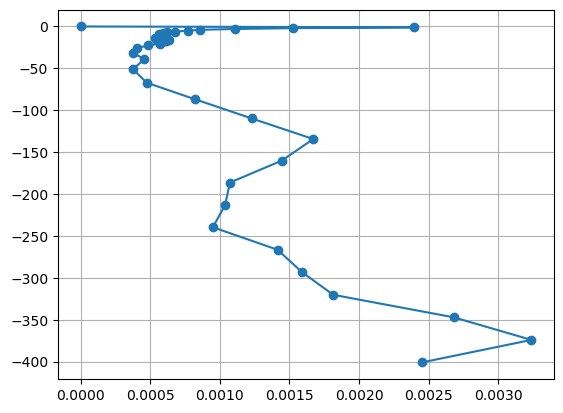

In [36]:
plt.plot(masked_vert_Kt.mean(axis=2).mean(axis=2).mean(axis=0), -data.depthw, 'o-')
plt.grid();

In [37]:
data = xr.open_dataset('/results2/SalishSea/hindcast-blue.single/02dec17/SalishSea_1h_20171202_20171202_grid_W.nc')
double = xr.open_dataset('/results2/SalishSea/hindcast-blue.double/02dec17/SalishSea_1h_20171202_20171202_grid_W.nc')
double

<xarray.Dataset>
Dimensions:               (y: 1796, x: 796, nvertex: 4, depthw: 80,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * depthw                (depthw) float32 0.0 0.5 1.0 1.5 ... 407.6 421.3 435.0
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2017-12-02T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    depthw_bounds         (depthw, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    vert_eddy_diff        (time_counter, depthw, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20171201_20171231_grid_W
    description:  ocean W grid variables
    title:        ocean W grid variables
    Conventions:  CF-1.6
    timeStamp:    2022-Aug-30 05:07:49 GMT
    uuid:         51d53137-ba0b-4cea-bacb-6e9e872792f8

In [38]:
doubmesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask_double_202207j.nc')
dtmask = np.array(doubmesh.tmask[0])
dmaskt = np.repeat(dtmask[None,...], 24, axis=0)

In [39]:
masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[0, :, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[:, 400*2:600*2, 125*2:300*2])
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[0, :, 400:600, 125:300], mask=1- tmask[:, 400:600, 125:300])


212.89656
0.00013062518311627525
216.43597
0.00036594689616768896


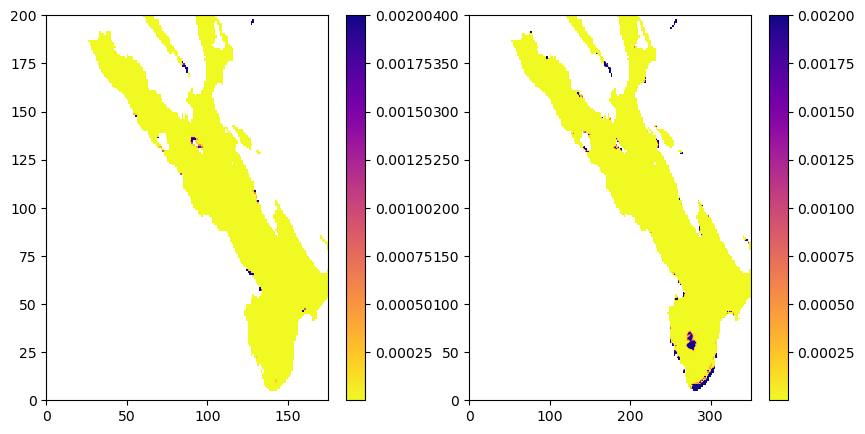

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 31
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

kk = 31*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_doub_K[kk].mean())

In [55]:
masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[:, :, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dmaskt[:, :, 400*2:600*2, 125*2:300*2])
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[:, :, 400:600, 125:300], mask=1- tmaskt[:, :, 400:600, 125:300])


212.89656
0.00013062518311627525
216.43597
0.00036594689616768896


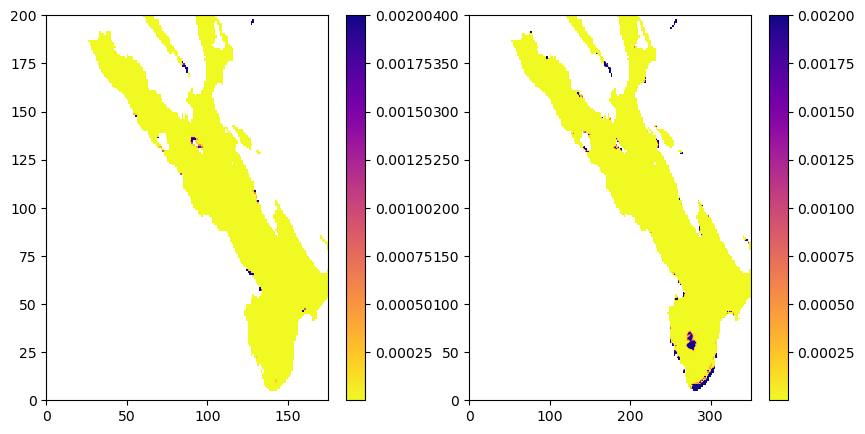

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 31
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[0, kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[0, kk].mean())

kk = 31*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[0, kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_doub_K[0, kk].mean())

0.00038706121688232255
0.0003293092540605628


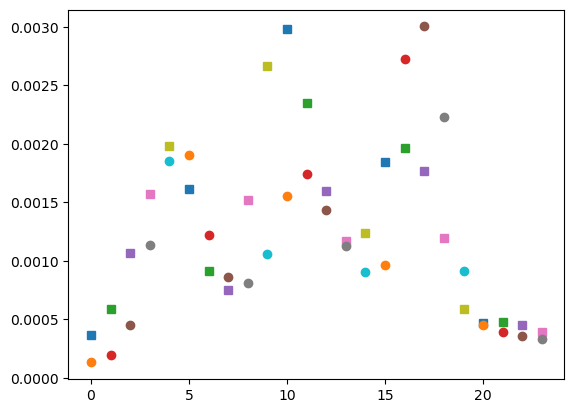

In [53]:
kk = 31
kk2 = 31*2 + 1
for tt in range(24):
    masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[tt, kk2, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[kk2, 400*2:600*2, 125*2:300*2])
    masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[tt, kk, 400:600, 125:300], mask=1- tmask[kk, 400:600, 125:300])
    plt.plot(tt, masked_doub_K.mean(), 's')
    plt.plot(tt, masked_vert_K.mean(), 'o')
print (np.ma.masked_array(double.vert_eddy_diff[tt, kk2, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[kk2, 400*2:600*2, 125*2:300*2]).mean())
print (np.ma.masked_array(data.vert_eddy_diff[tt, kk, 400:600, 125:300], mask=1- tmask[kk, 400:600, 125:300]).mean())

50.963238
0.0009851384472312863
51.913795
0.000585825024195606


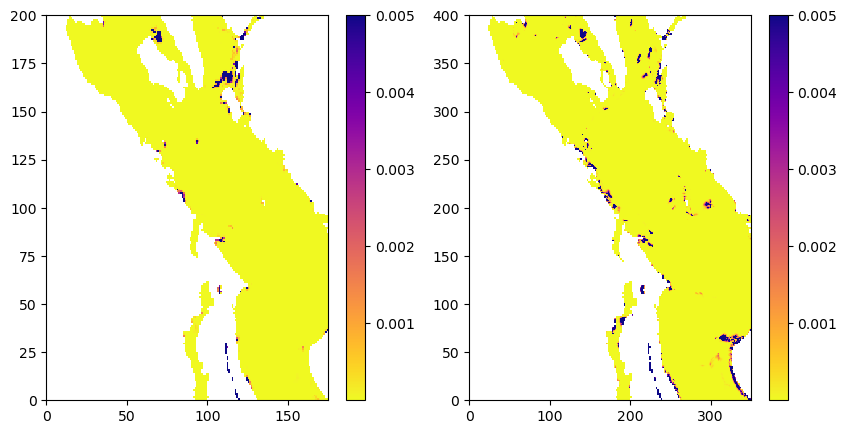

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 24
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[0, kk]), cmap='plasma_r', vmax=5e-3)
plt.colorbar(colours);
print (masked_vert_K[0, kk].mean())

kk = 24*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[0, kk]), cmap='plasma_r', vmax=5e-3)
plt.colorbar(colours);
print (masked_doub_K[0, kk].mean())

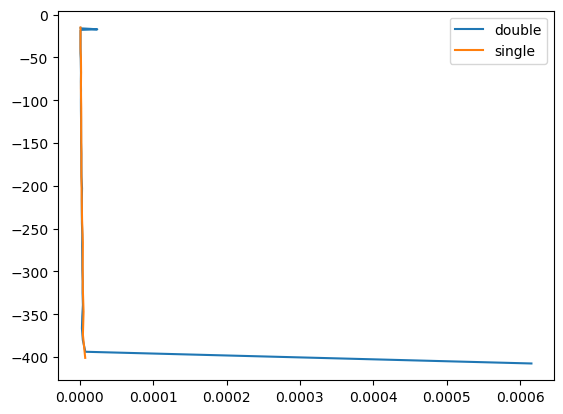

In [59]:
ss = -5
plt.plot(masked_doub_K[0, 31:, 200-2*ss, 190-2*ss], -double.depthw[31:].values, label='double')
plt.plot(masked_vert_K[0, 15:, 100-ss, 95-ss], -data.depthw[15:].values, label='single')
plt.legend();

(95, 11) (95, 11)


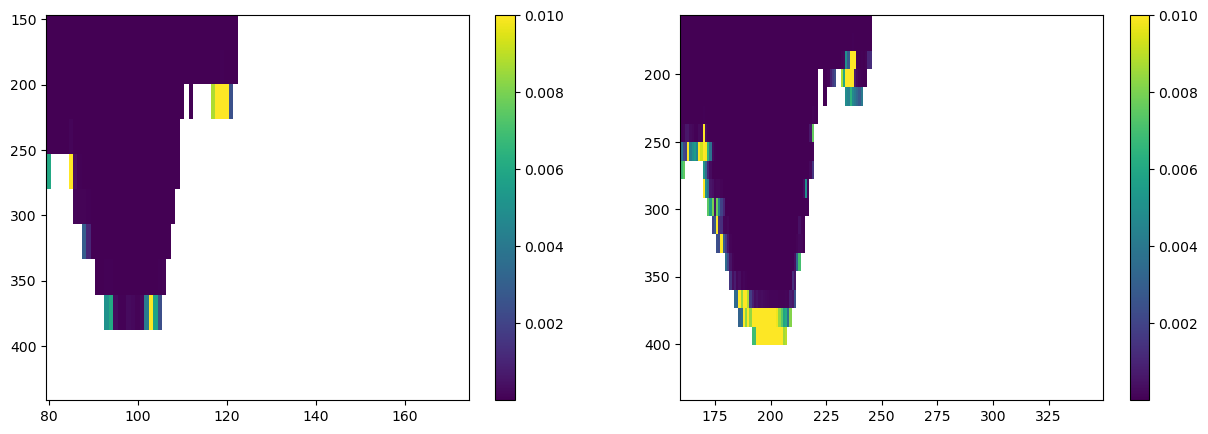

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
topk = 29
ii = 140
xx, yy = np.meshgrid(  data.depthw[topk:].values,np.arange(80, 175),)
print (xx.shape, masked_vert_K[:, topk:, ii, 80:].mean(axis=0).T.shape)
colours = axs[0].pcolormesh(yy, xx, (masked_vert_K[:, topk:, ii, 80:].mean(axis=0).T), vmax=0.01, shading='nearest')
axs[0].invert_yaxis();
fig.colorbar(colours, ax=axs[0])
xx, yy = np.meshgrid(  double.depthw[topk*2+1:].values,np.arange(80*2, 175*2),)
colours = axs[1].pcolormesh(yy, xx, masked_doub_K[:, topk*2+1:, ii*2, 160:].mean(axis=0).T, vmax=0.01)
fig.colorbar(colours, ax=axs[1])
axs[1].invert_yaxis();

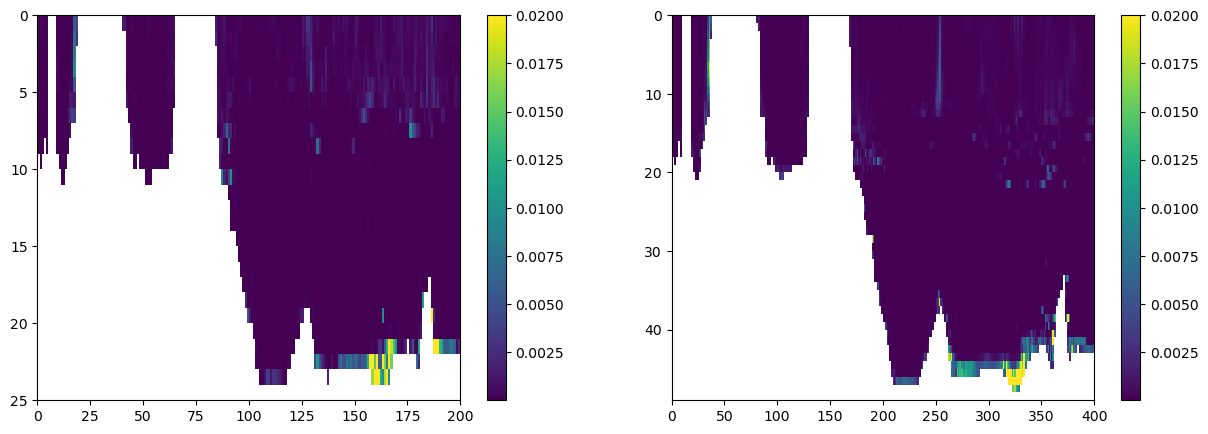

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colours = axs[0].pcolormesh(masked_vert_K[:, 15:, :, 100].mean(axis=0), vmax=0.02)
axs[0].invert_yaxis();
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(masked_doub_K[:, 15*2+1:, :, 200].mean(axis=0), vmax=0.02)
fig.colorbar(colours, ax=axs[1])
axs[1].invert_yaxis();

Okay, but not convincing.  Look at the salinity decrease instead.

# ZDFTMX: NEMO #

In [ ]:
# Laurent Vertical Function
# exp(-(H+z)/h_o  over ho(1-exp(-H/ho))

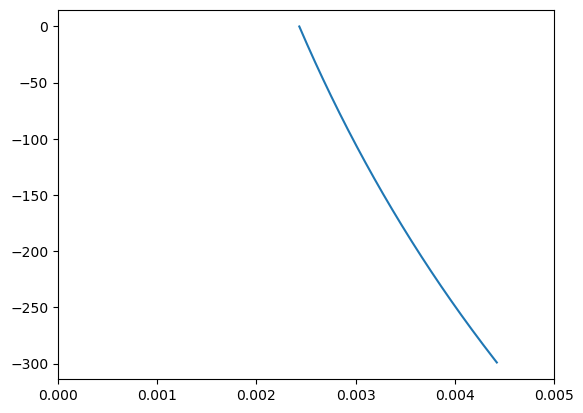

In [62]:
ho = 500 # typical value from pg 211
H = 300 # depth of water
z = -np.arange(H)
fig, ax = plt.subplots(1, 1)
ax.plot(np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho)), z);
ax.set_xlim(0, 0.005);

/tmp/ipykernel_2374394/186776635.py:8: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_2374394/186776635.py:9: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
/tmp/ipykernel_2374394/186776635.py:14: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_2374394/186776635.py:15: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
/tmp/ipykernel_2374394/186776635.py:20: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_2374394/186776635.py:21: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);


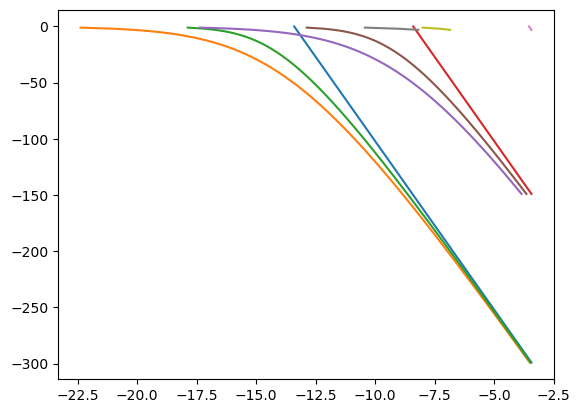

In [63]:
ho = 30 # based on analysis below
H = 300 # depth of water
z = -np.arange(H)
fig, ax = plt.subplots(1, 1)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
scale = 3*ho
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
H = 150
z = -np.arange(H)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
H = 4
z = -np.arange(H)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);


In [ ]:
# Polzin 2009

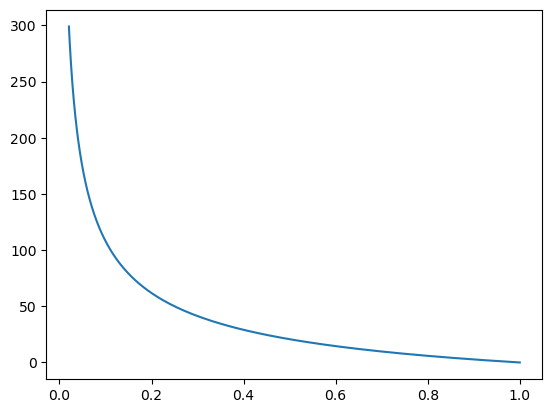

In [64]:
H = 300 # depth of water
z = -np.arange(H)
# epsilon = eo/(1+z/zo)**2
zo = 50
fig, ax = plt.subplots(1, 1)
ax.plot(1/(1-z/zo)**2, -z)

In [ ]:
# 1/zo = 2 A alpha beta(omega) N-2 b mo^4

# Polzin Calculation #

## Climatology Sigma Profile in Deep SoG ##

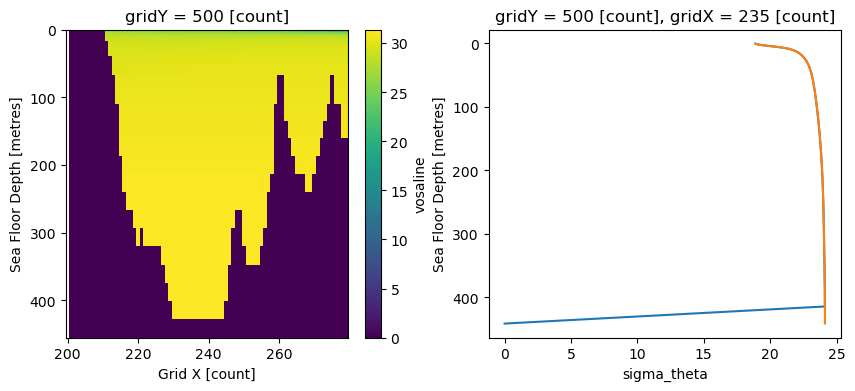

In [419]:
# TS = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/05nov18/SalishSea_1d_20181105_20181105_grid_T.nc')
TS = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_month_climatology_grid_T_20070101_20231231.nc')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
TS.vosaline[:, :, 500, 200:280].mean(axis=0).plot(ax=axs[0], yincrease=False);
yy = 500
xx = 235
sigma = TS.sigma_theta[:, :, yy, xx].mean(axis=0)
sigma.plot(ax=axs[1], y='depth', yincrease=False);
sigma[-1] = sigma[-2]
sigma.plot(ax=axs[1], y='depth', yincrease=False, c='tab:orange');

-0.0 428.0


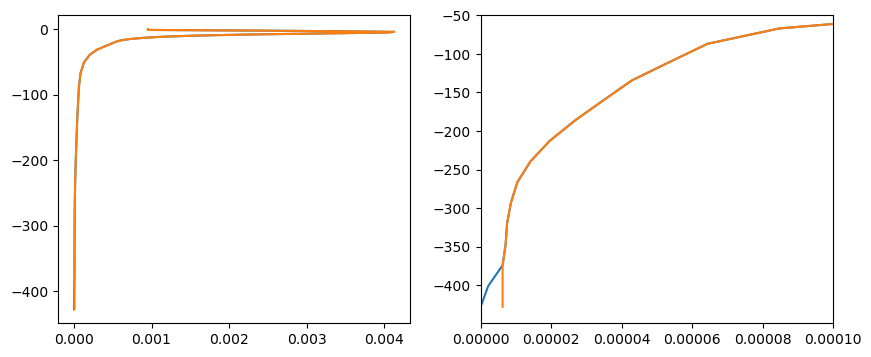

In [219]:
zz = 40
g = 9.8
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
N2 = np.zeros((40))
N2[1:] = (-g*(sigma[:zz-1].values - sigma[1:zz].values)/ e3t[:zz-1, yy, xx] / 1024)
N2[0] = N2[1]
for ax in axs:
    ax.plot(N2, -data.depthw)
axs[1].set_xlim(0, 0.0001);
axs[1].set_ylim(None, -50);
print (N2[-1], data.depthw[39].values)
N2[-2:] = N2[-3]
for ax in axs:
    ax.plot(N2, -data.depthw);

In [220]:
N2

array([9.53145738e-04, 9.53145738e-04, 2.35558401e-03, 3.42661993e-03,
       4.12901632e-03, 4.02931079e-03, 3.44758170e-03, 2.82820809e-03,
       2.26223935e-03, 1.82066722e-03, 1.48582364e-03, 1.23292572e-03,
       1.04752927e-03, 9.05326351e-04, 7.96834232e-04, 7.09092478e-04,
       6.42422432e-04, 5.91792872e-04, 5.49955996e-04, 5.14576885e-04,
       4.69899387e-04, 4.01333006e-04, 2.97785804e-04, 2.01929275e-04,
       1.27408411e-04, 8.47834760e-05, 6.44105378e-05, 5.40058711e-05,
       4.29673023e-05, 3.48910332e-05, 2.67904421e-05, 1.95824164e-05,
       1.40964945e-05, 1.04006723e-05, 8.56168973e-06, 7.47669161e-06,
       7.07344903e-06, 6.22045058e-06, 6.22045058e-06, 6.22045058e-06])

## Calculate Z star ##

Moving to equations (5) and (6) in https://www.sciencedirect.com/science/article/pii/S1463500309001565?casa_token=4MNVwn-vId4AAAAA:rYBf0DPVxjoRfRG2SdVFB53WqRf2wsrH8mfVb10CjxILDh3BteFfORKCrXXVlLVi8g_CpFe1FV4 

We see zstar = int_0^z of N2/N2(z=0) dz and then
epsilon = epsilon_0 N2/N2(0)/ (1 + zstar/zo)^2

Using N2 above we calculate zstar

(40,)


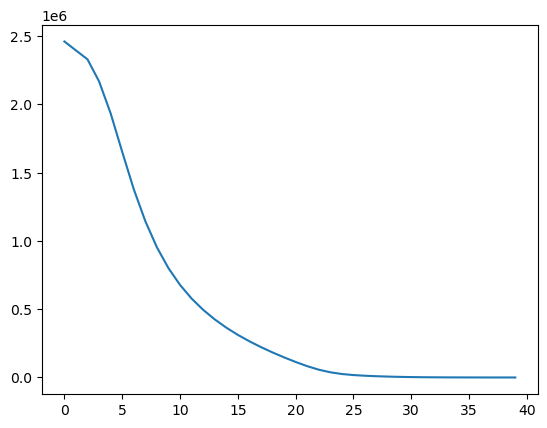

In [228]:
print (N2.shape)
zstar = np.zeros((zz))
zstar[zz-1] = data.depthw[zz-1] - data.depthw[zz-2] 
for kk in range(zz-2, -1, -1):
    zstar[kk] = zstar[kk+1] + N2[kk] * (data.depthw[zz-1] - data.depthw[kk]) /N2[-1]
fig, ax = plt.subplots(1, 1)
ax.plot(zstar);

In [222]:
zstar

array([2.46069478e+06, 2.39511329e+06, 2.32968504e+06, 2.16836573e+06,
       1.93424871e+06, 1.65280564e+06, 1.37880651e+06, 1.14492011e+06,
       9.53507229e+05, 8.00762904e+05, 6.78126064e+05, 5.78282943e+05,
       4.95632688e+05, 4.25580117e+05, 3.65184576e+05, 3.12157874e+05,
       2.65089428e+05, 2.22559116e+05, 1.83492584e+05, 1.47306506e+05,
       1.13585422e+05, 8.29620661e+04, 5.70216641e+04, 3.80212921e+04,
       2.53973697e+04, 1.76748333e+04, 1.27551863e+04, 9.22391662e+03,
       6.46076192e+03, 4.43236827e+03, 2.92929931e+03, 1.88836051e+03,
       1.21119974e+03, 7.84376670e+02, 5.14338610e+02, 3.29052829e+02,
       1.99591357e+02, 1.07724609e+02, 5.38630981e+01, 2.69315491e+01])

# Calculate kappa version of Polzin Eqn 6 #

In [241]:
zo = 50

KPolzin = 1 / N2 / (1 + zstar/zo)**2
scale = KPolzin[-1]
KPolzin = KPolzin / scale

(-449.4, -250.0)

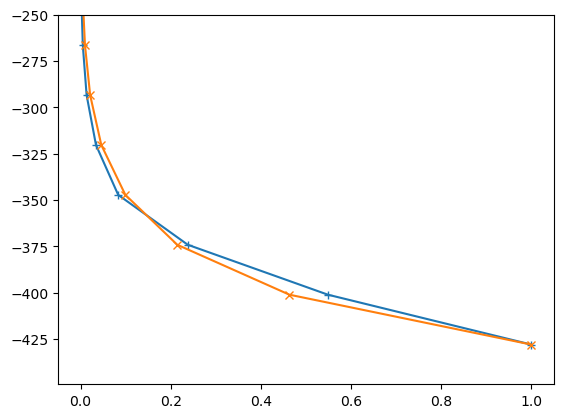

In [270]:
fig, ax = plt.subplots(1, 1)
dw = np.array(data.depthw)
ax.plot(KPolzin, -dw, '-+')
ho = 35
ax.plot(np.exp((-dw[39]+dw[2:])/ho), -dw[2:], '-x');
#    ax.plot(1/(1+(dw[39]-dw[2:])/ho)**2, -dw[2:])
#x.set_xlim(1e-5, None)
ax.set_ylim(None, -250)

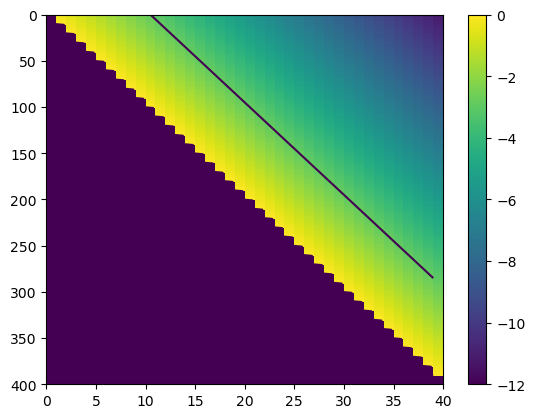

In [344]:
ho = 35 # based on analysis above
xs = np.arange(40)
maxH = 400
H = maxH * xs / 40 # depth of water
zs = -np.arange(maxH)
xx, zz = np.meshgrid(xs, zs)
fig, ax = plt.subplots(1, 1)
kappa = np.log(np.exp(-(H+zz)/ho))
kappa[-zz > H] = -12
colors = ax.pcolormesh(kappa);
ax.contour(kappa, levels=[-3])
ax.invert_yaxis()
fig.colorbar(colors);


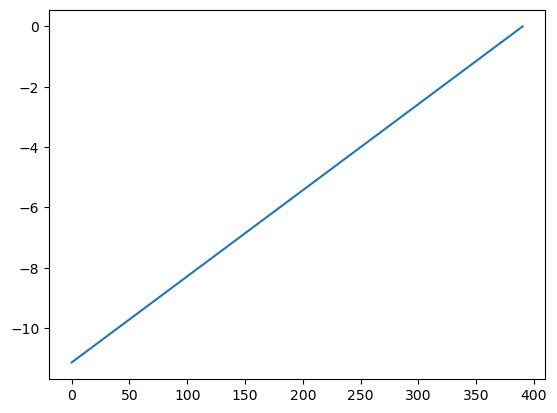

In [294]:
plt.plot(kappa[:391, 39])
print (kappa[:391

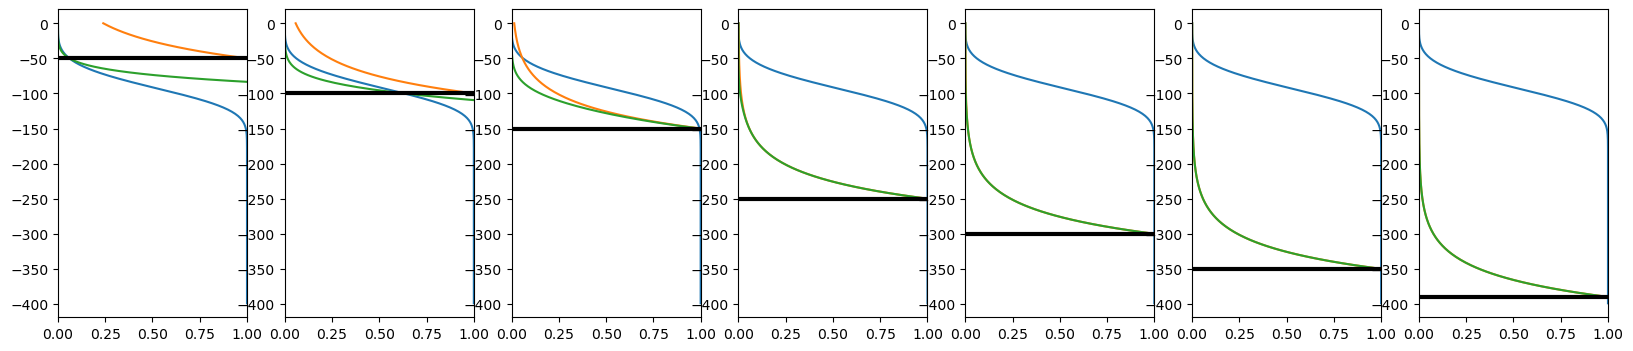

In [378]:
fig, axs = plt.subplots(1, 7, figsize=(20, 4))
sho = 100
kappa_limit = (1 - np.exp(-zs**4/sho**4))
for ii, posi in enumerate([5, 10, 15, 25, 30, 35, 39]):
    kappa = np.exp(-(H[posi]+zz[:, posi])/ho)
    axs[ii].plot(kappa_limit, zs)
    axs[ii].plot(kappa, zs)
    axs[ii].plot(kappa * kappa_limit, zs)
    axs[ii].plot([0, 1], [-H[posi], -H[posi]], lw=3, c='k')
    axs[ii].set_xlim(0, 1)

/tmp/ipykernel_2374394/811269796.py:3: RuntimeWarning: divide by zero encountered in log10
  kappa_log = np.log10(kappao.transpose() * kappa_limit).transpose()


1.0
1.0


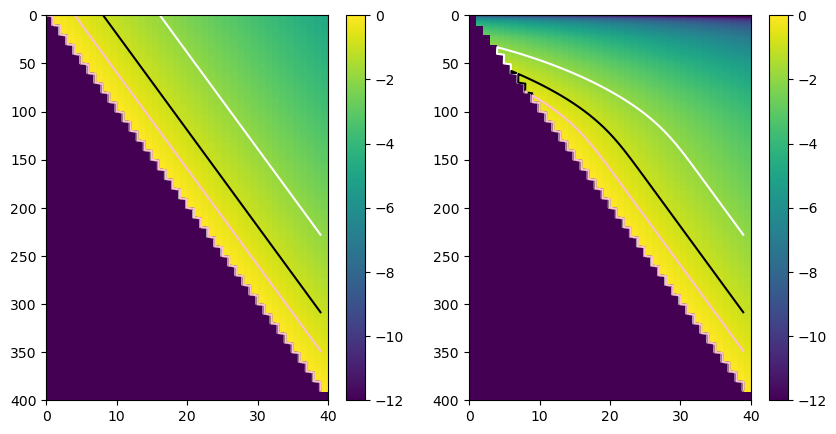

In [379]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kappao = np.exp(-(H+zz)/ho)
kappa_log = np.log10(kappao.transpose() * kappa_limit).transpose()
kappa_log[-zz > H] = -12
colors = axs[1].pcolormesh(kappa_log, vmax=0, vmin=-12);
axs[1].contour(kappa_log, levels=[-2, -1, -0.5], colors=['w', 'k' ,'pink'])
print (10**(kappa_log.max()))
axs[1].invert_yaxis()
fig.colorbar(colors, ax=axs[1]);
kappao_log = np.log10(kappao)
kappao_log[-zz > H] = -12
colors = axs[0].pcolormesh(kappao_log, vmax=0, vmin=-12);
axs[0].contour(kappao_log, levels=[-2, -1, -0.5], colors=['w', 'k', 'pink'])
print (10**(kappao_log.max()))
axs[0].invert_yaxis()
fig.colorbar(colors, ax=axs[0]);

/tmp/ipykernel_2374394/1910548315.py:26: RuntimeWarning: divide by zero encountered in log10
  colours = axs[0, 1].pcolormesh(xs, zs, np.ma.array(np.log10(kappal), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
/tmp/ipykernel_2374394/1910548315.py:30: RuntimeWarning: divide by zero encountered in log10
  axs[1, 1].plot(np.ma.array(np.log10(kappal[:, xi]), mask=top_mask[:, xi]), zs)
/tmp/ipykernel_2374394/1910548315.py:38: RuntimeWarning: divide by zero encountered in log10
  colours = axs[row, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
/tmp/ipykernel_2374394/1910548315.py:39: RuntimeWarning: divide by zero encountered in log10
  axs[row, 0].contour(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), levels=[-6], colors=['w'])
/tmp/ipykernel_2374394/1910548315.py:42: RuntimeWarning: divide by zero encountered in log10
  axs[row, 1].plot(np.ma.array(np.log10(kappa[:, xi]), mask=top_mask[:, xi]), zs)


6.849338688325842e-07
-30
-90 4.811290095345477e-05
-91 4.96287499909579e-05
-92 5.114888388690906e-05
-93 5.267123851192528e-05
-94 5.419371879237135e-05
-95 5.5714206550656965e-05
-96 5.72305686768629e-05
-97 5.8740665586717384e-05
-98 6.024235991658115e-05
-99 6.173352540202453e-05
-100 6.321205588285577e-05
-101 6.467587437415526e-05
-102 6.612294214004527e-05
-103 6.755126770464417e-05
-104 6.895891573297083e-05
-105 7.034401571353409e-05
-106 7.170477037400622e-05
-107 7.30394637617773e-05
-108 7.434646892234726e-05
-109 7.562425511045408e-05
-110 7.687139447156714e-05
-111 7.808656813489208e-05
-112 7.926857166332214e-05
-113 8.041631981080297e-05
-114 8.152885054331388e-05
-115 8.260532828605428e-05
-116 8.364504636639617e-05
-117 8.464742862964375e-05
-118 8.561203021254226e-05
-119 8.653853746770357e-05
-120 8.742676704055721e-05
-121 8.827666410898312e-05
-122 8.908829980431462e-05
-123 8.986186784079982e-05
-30 8.067283394428859e-07
-31 9.192696422724578e-07
-32 1.043097606

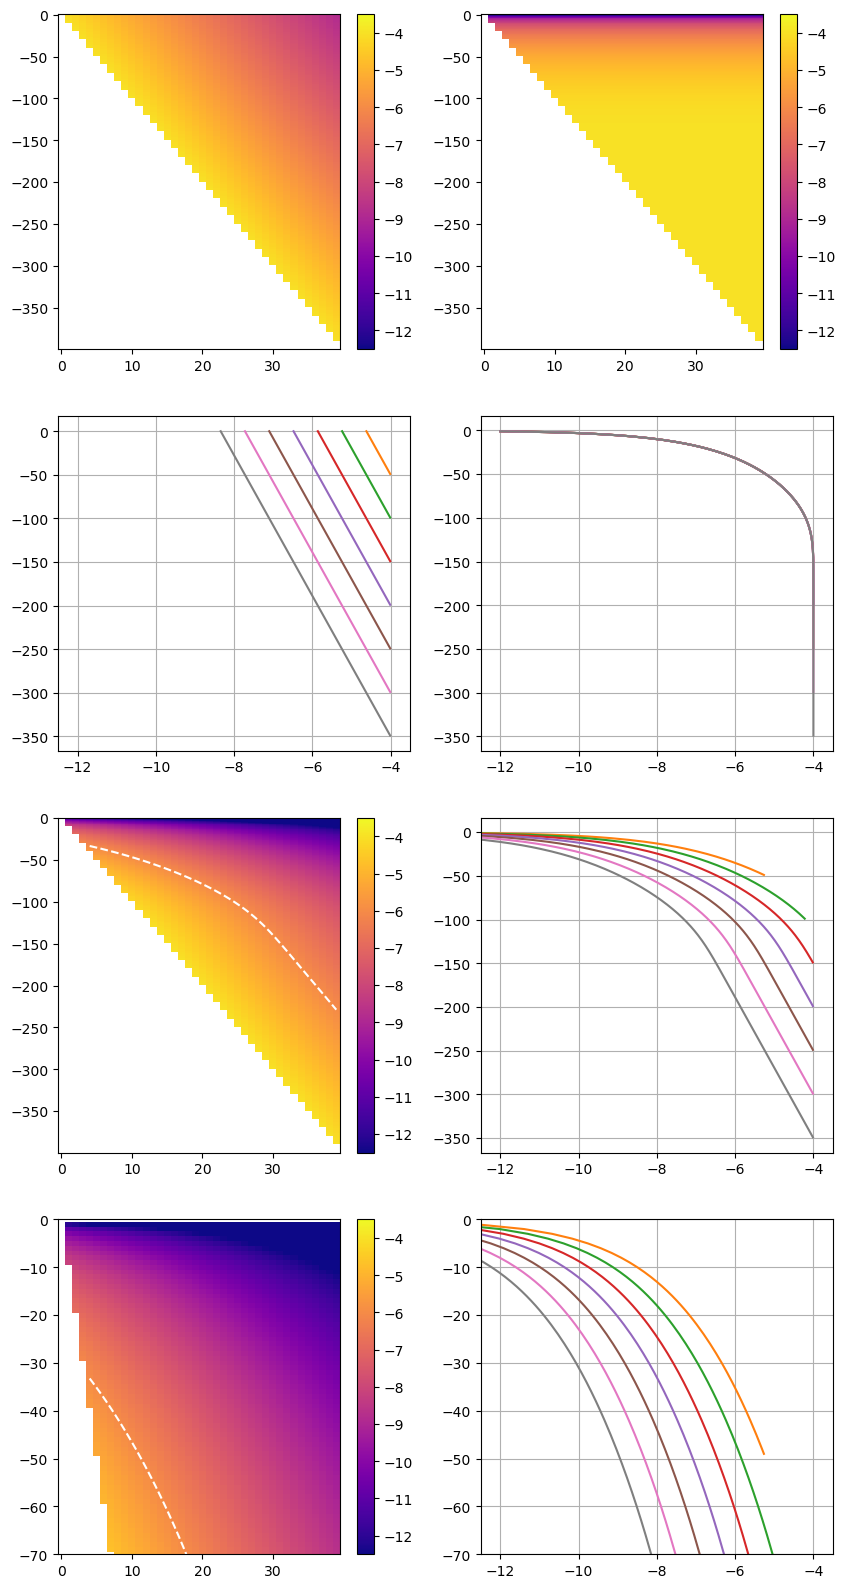

In [405]:
# parameters
kmag = 1e-4 # maximum magnitude of extra diffusivity
ho = 35 # based on analysis below
sho = 100 # surface depth protection scale
klm = 1 # coefficient on the limiter
sx = 4

# domain
xs = np.arange(40)
maxH = 400
H = maxH * xs / 40 # depth of water
zs = -np.arange(maxH)
xx, zz = np.meshgrid(xs, zs)
top_mask = np.ones_like(zz)
top_mask[H+zz > 0] = 0 

# calculate kappa
kappa0 = kmag * np.exp(-(H+zz)/ho)
#kappal = klm * kmag * (1 - np.tanh((zz + sho)/sx))/2.
kappal = klm * kmag * (1 - np.exp(-zz**4/sho**4))

fig, axs = plt.subplots(4, 2, figsize=(10, 20))
vmin, vmax = -12.5, -3.5
colours = axs[0, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa0), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
fig.colorbar(colours, ax=axs[0, 0])
colours = axs[0, 1].pcolormesh(xs, zs, np.ma.array(np.log10(kappal), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
fig.colorbar(colours, ax=axs[0, 1])
for xi in xs[::5]:
    axs[1, 0].plot(np.ma.array(np.log10(kappa0[:, xi]), mask=top_mask[:, xi]), zs)
    axs[1, 1].plot(np.ma.array(np.log10(kappal[:, xi]), mask=top_mask[:, xi]), zs)

#for xi in xs:
#    for zj in zs:
#        kappa[zj, xi] = min(kappal[zj, xi], kappa0[zj, xi]) 
kappa = kappal * kappa0 / kmag

for row in [2, 3]:
    colours = axs[row, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
    axs[row, 0].contour(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), levels=[-6], colors=['w'])
    fig.colorbar(colours, ax=axs[row, 0])
    for xi in xs[::5]:
        axs[row, 1].plot(np.ma.array(np.log10(kappa[:, xi]), mask=top_mask[:, xi]), zs)

for ax in axs[3]:
    ax.set_ylim(-70, 0)

for ax in [axs[1, 0], axs[1, 1], axs[2, 1], axs[3, 1]]:
    ax.set_xlim(vmin, vmax);
    ax.grid();

iz = 31
print (np.ma.array(kappa[:iz], mask=top_mask[:iz]).max())
print (zs[:iz].min())
for iz in range(90, 124):
    print (zs[iz], np.ma.array(kappal[iz], mask=top_mask[iz]).max())
for iz in range(30, 50):
    print (zs[iz], np.ma.array(kappal[iz], mask=top_mask[iz]).max())

Multiply. Exponent = 4 and sho = 80
With klm=1, I protect waters above 32 m and have values as high as 1e-4.5 = 3e-5 at depths > 150 m.   
Move exponent inside.
I protect waters above 27 m and have values as high as 1e-4 at depths > 100 m
sho = 90
29 m and well and truly 150 m
33 m and still 1e-4 at 150 m

From TimeSeries/PlotVENUSModelComparisons-double.ipynb we get a salinity decrease of -1.5e-3 g/kg/day in the observations and the central node.   
Central node is at 300 m depth and assuming it is 10 m above the bottom.


<xarray.DataArray 'sigma_theta' (depth: 40)>
array([18.891382, 18.990976, 19.237112, 19.595163, 20.026615, 20.44766 ,
       20.807938, 21.103521, 21.340004, 21.530405, 21.685913, 21.815153,
       21.925291, 22.021036, 22.106264, 22.183764, 22.256891, 22.32946 ,
       22.406229, 22.494751, 22.604239, 22.74231 , 22.90162 , 23.06988 ,
       23.227308, 23.370008, 23.504335, 23.633072, 23.7437  , 23.837408,
       23.910994, 23.965416, 24.004831, 24.034004, 24.058058, 24.07908 ,
       24.098978, 24.11648 , 24.122465, 24.122465], dtype=float32)
Coordinates:
    gridY    int64 500
    gridX    int64 235
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5


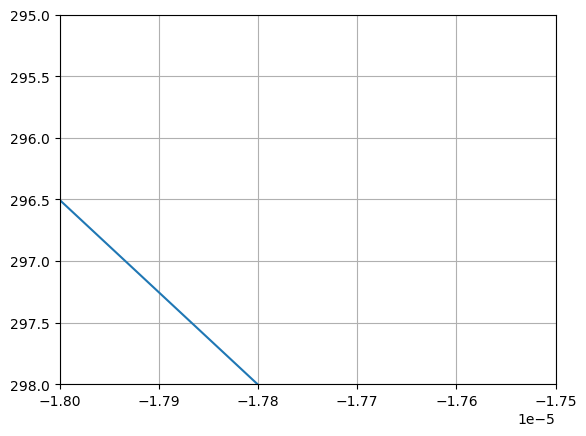

In [448]:
zz = 40
g = 9.8
yy = 500
xx = 235
print (sigma)
curve = np.empty((40))
curve[1:zz-1] = (0.5 * sigma[:zz-2].values / e3t[:zz-2, yy, xx].values / (e3t[:zz-2, yy, xx].values + e3t[1:zz-1, yy, xx].values)
            - 0.5 * sigma[1:zz-1].values / e3t[:zz-2, yy, xx].values / e3t[1:zz-1, yy, xx].values
            + 0.5 * sigma[:zz-2].values/ e3t[1:zz-1, yy, xx].values / (e3t[:zz-2, yy, xx].values + e3t[1:zz-1, yy, xx].values))
plt.plot(curve[1:zz-1], TS.depth[1:zz-1], '-o')
plt.xlim(-0.000018, -0.0000175)
plt.ylim(298, 295)
plt.grid()

AT 300 m we have curvature d^S/dz^2 of stratification of -1.75e-5 g/kg/m2

In [ ]:
So kappa = -1.5e-3 g/kg/day /-1.78e-5 g/kg/m2
0.86e2 m2/day
1e-4 m2/s
now measurements are 1 to 2 m above the bottom
https://journals.ametsoc.org/view/journals/phoc/53/1/JPO-D-22-0047.1.xml
0.96e-4 m2/s

In [452]:
# obs
print (-1.5e-3/-1.78e-5)
print (-1.5e-3/-1.78e-5/86400)
print (np.exp(-1.5/ho))
print (-1.5e-3/-1.78e-5/86400/np.exp(-1.5/ho))

84.26966292134833
0.0009753433208489389
0.9580482443263975
0.0010180524066767656


In [453]:
# 20211
print (-0.98e-3/-1.78e-5)
print (-0.98e-3/-1.78e-5/86400)
print (np.exp(-1.5/ho))
print (-0.98e-3/-1.78e-5/86400/np.exp(-1.5/ho))

55.0561797752809
0.00063722430295464
0.9580482443263975
0.0006651275723621535


In [ ]:
v = x**2, so dvdx= 2


In [412]:
e3t[:, 250, 250].values

array([ 1.00000115,  1.00000501,  1.00001253,  1.00002718,  1.0000557 ,
        1.00011125,  1.00021946,  1.0004302 ,  1.00084067,  1.00164012,
        1.0031971 ,  1.00622914,  1.01213271,  1.02362358,  1.04597551,
        1.08940061,  1.17356428,  1.33592899,  1.64636781,  2.22990285,
        3.29248567,  5.11998508,  7.97451506, 11.8252972 , 16.10792044,
       19.95870258, 22.81323256, 14.34398256, 14.34398256, 26.28684983,
       26.59728865, 26.75965336, 26.84381704, 26.88724213, 26.90959407,
       26.92108493, 26.9269885 , 26.93002054, 26.93157752, 26.93237697])

In [415]:
print (data.depthw[1:].values - data.depthw[:-1].values)

[ 1.0000012  1.0000052  1.0000129  1.0000274  1.0000572  1.000113
  1.0002236  1.0004387  1.0008564  1.0016708  1.0032558  1.0063457
  1.0123577  1.0240631  1.0468264  1.0910482  1.1767311  1.341938
  1.6575012  2.24959    3.3243484  5.163622   8.017824  11.844379
 16.088833  19.915398  22.7696    24.608864  25.683624  26.275726
 26.591278  26.756485  26.842163  26.886383  26.90918   26.920837
 26.92688   26.929962  26.93155  ]


Below is using limit rather than multiplying

/tmp/ipykernel_2374394/3372743310.py:26: RuntimeWarning: divide by zero encountered in log10
  colours = axs[0, 1].pcolormesh(xs, zs, np.ma.array(np.log10(kappal), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
/tmp/ipykernel_2374394/3372743310.py:30: RuntimeWarning: divide by zero encountered in log10
  axs[1, 1].plot(np.ma.array(np.log10(kappal[:, xi]), mask=top_mask[:, xi]), zs)
/tmp/ipykernel_2374394/3372743310.py:37: RuntimeWarning: divide by zero encountered in log10
  colours = axs[row, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
/tmp/ipykernel_2374394/3372743310.py:38: RuntimeWarning: divide by zero encountered in log10
  axs[row, 0].contour(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), levels=[-6], colors=['w'])
/tmp/ipykernel_2374394/3372743310.py:41: RuntimeWarning: divide by zero encountered in log10
  axs[row, 1].plot(np.ma.array(np.log10(kappa[:, xi]), mask=top_mask[:, xi]), zs)


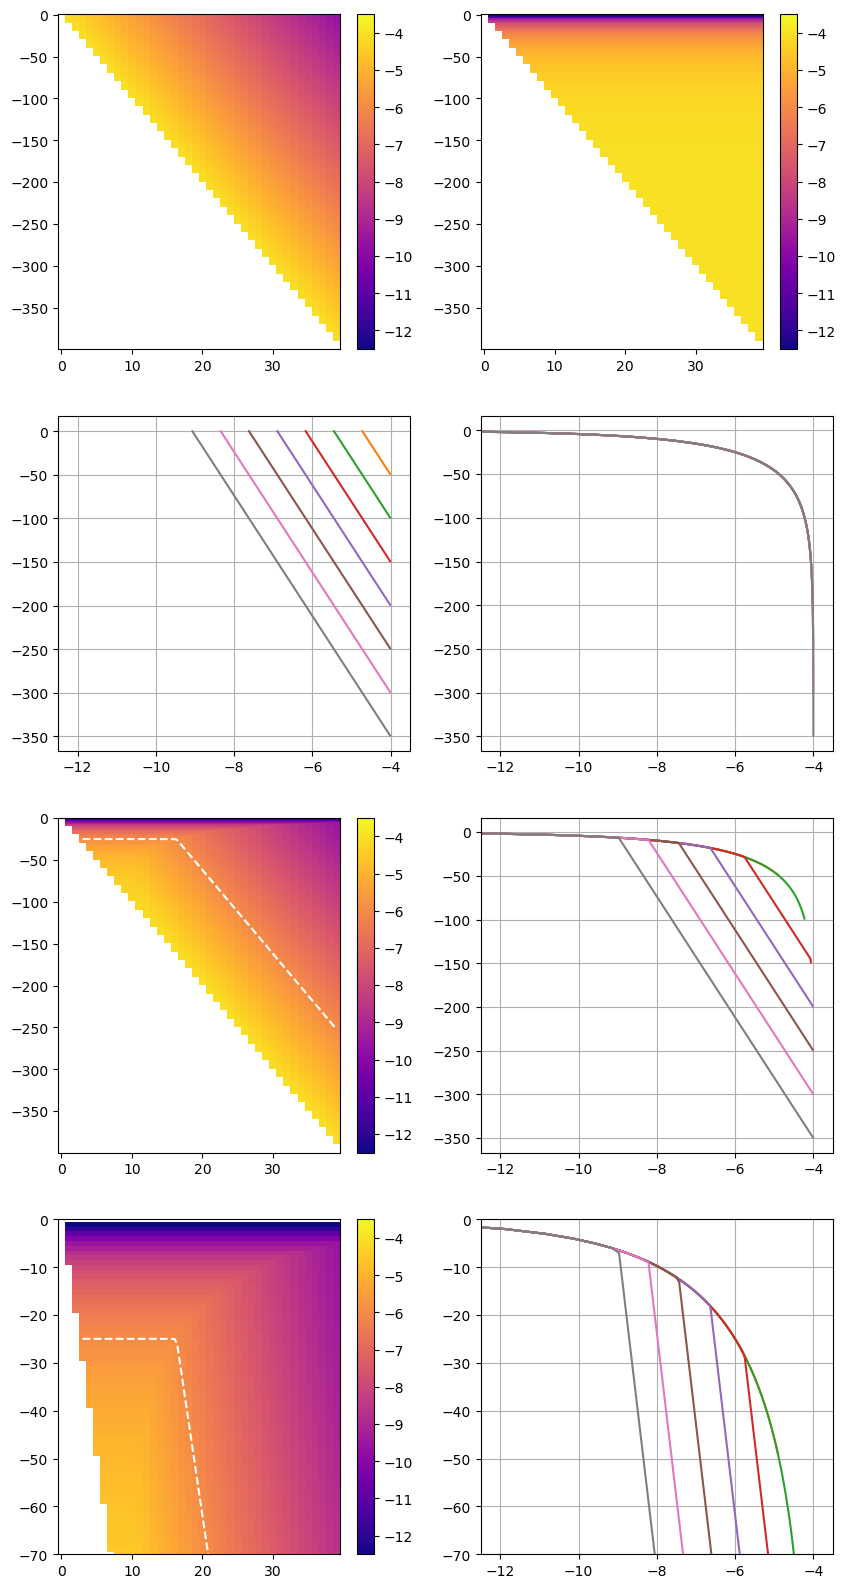

In [170]:
# parameters
kmag = 1e-4 # maximum magnitude of extra diffusivity
ho = 30 # based on analysis below
sho = 40 # surface depth protection scale
klm = 1 # coefficient on the limiter
sx = 6

# domain
xs = np.arange(40)
maxH = 400
H = maxH * xs / 40 # depth of water
zs = -np.arange(maxH)
xx, zz = np.meshgrid(xs, zs)
top_mask = np.ones_like(zz)
top_mask[H+zz > 0] = 0 

# calculate kappa
kappa0 = kmag * np.exp(-(H+zz)/ho)
#kappal = klm * kmag * (1 - np.tanh((zz + sho)/sx))/2.
kappal = klm * kmag * (1 - np.exp(zz/sho))**sx

fig, axs = plt.subplots(4, 2, figsize=(10, 20))
vmin, vmax = -12.5, -3.5
colours = axs[0, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa0), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
fig.colorbar(colours, ax=axs[0, 0])
colours = axs[0, 1].pcolormesh(xs, zs, np.ma.array(np.log10(kappal), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
fig.colorbar(colours, ax=axs[0, 1])
for xi in xs[::5]:
    axs[1, 0].plot(np.ma.array(np.log10(kappa0[:, xi]), mask=top_mask[:, xi]), zs)
    axs[1, 1].plot(np.ma.array(np.log10(kappal[:, xi]), mask=top_mask[:, xi]), zs)

for xi in xs:
    for zj in zs:
        kappa[zj, xi] = min(kappal[zj, xi], kappa0[zj, xi]) 

for row in [2, 3]:
    colours = axs[row, 0].pcolormesh(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), vmin=vmin, vmax=vmax, cmap='plasma')
    axs[row, 0].contour(xs, zs, np.ma.array(np.log10(kappa), mask=top_mask), levels=[-6], colors=['w'])
    fig.colorbar(colours, ax=axs[row, 0])
    for xi in xs[::5]:
        axs[row, 1].plot(np.ma.array(np.log10(kappa[:, xi]), mask=top_mask[:, xi]), zs)

for ax in axs[3]:
    ax.set_ylim(-70, 0)

for ax in [axs[1, 0], axs[1, 1], axs[2, 1], axs[3, 1]]:
    ax.set_xlim(vmin, vmax);
    ax.grid();

Exponent = 4 and sho = 120
With klm=10, I protect waters above 24 m and have values as high at 1e-4 at depths > 100 m.  
With klm=1, I protect waters above 46 m and have values as high as 1e-4.5 = 3e-5 at depths > 150 m.  
With klm=0.1, I protect waters above 100 m and have values as high at 1e-5 at depths > 270 m.  

Exponent = 4 and sho = 80
With klm=10, I protect waters above 15 m and have values as high at 1e-4 at depths > 100 m.  
With klm=1, I protect waters above 30 m and have values as high as 1e-4.5 = 3e-5 at depths > 150 m. 
With klm=0.1, I protect waters above 70 m and have values as high at 1e-5 at depths > 270 m.  

Exponent = 4 and sho = 40
With klm=10, I protect waters above 8 m and have values as high at 1e-4 at depths > 50 m.  
With klm=1, I protect waters above 16 m and have values as high as 1e-4 at depths > 150 m.  
With klm=0.1, I protect waters above 32 m and have values as high at 1e-5 at depths > 270 m.  

Exponent = 6 and sho = 80
With klm=10, I protect waters above 30 m and have values as high at 1e-4 at depths > 100 m.  
With klm=1, I protect waters above 50 m and have values as high as 1e-4.5 = 3e-5 at depths > 150 m.  
With klm=0.1, I protect waters above 100 m and have values as high at 1e-5 at depths > 270 m.  

Exponent = 6 and sho = 40.   
With klm=10, I protect waters above 16 m and have values as high at 1e-4 at depths > 50 m.  
**With klm=1, I protect waters above 26 m and have values as high as 1e-4 at depths > 150 m.**  
With klm=0.1, I protect waters above 46 m and have values as high at 1e-5 at depths > 120 m.  

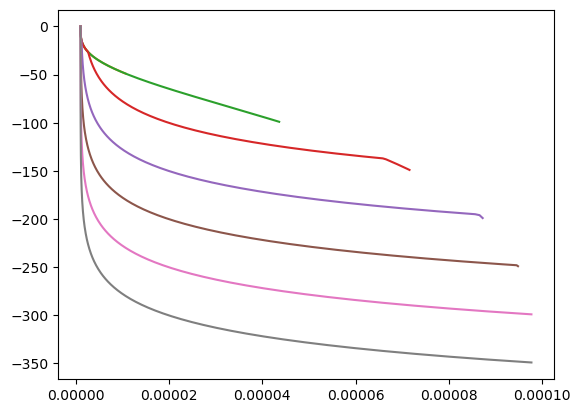

In [167]:
for xi in xs[::5]:
    plt.plot(np.ma.array(kappa[:, xi]+1e-6, mask=top_mask[:, xi]), zs)

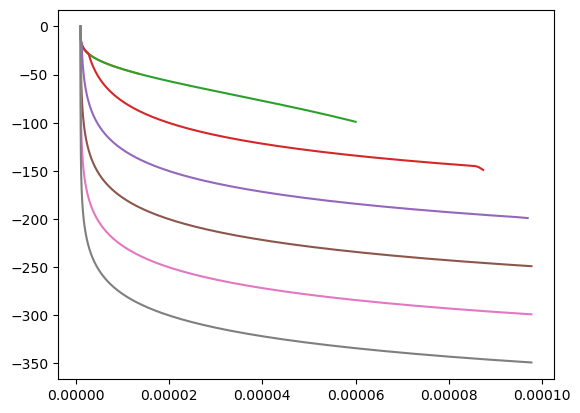

In [171]:
for xi in xs[::5]:
    plt.plot(np.ma.array(kappa[:, xi]+1e-6, mask=top_mask[:, xi]), zs)

/tmp/ipykernel_2374394/4119625633.py:12: RuntimeWarning: divide by zero encountered in log10
  kappa = np.log10(kappa)
/tmp/ipykernel_2374394/4119625633.py:20: RuntimeWarning: divide by zero encountered in log10
  kappa = np.log10(kappa)


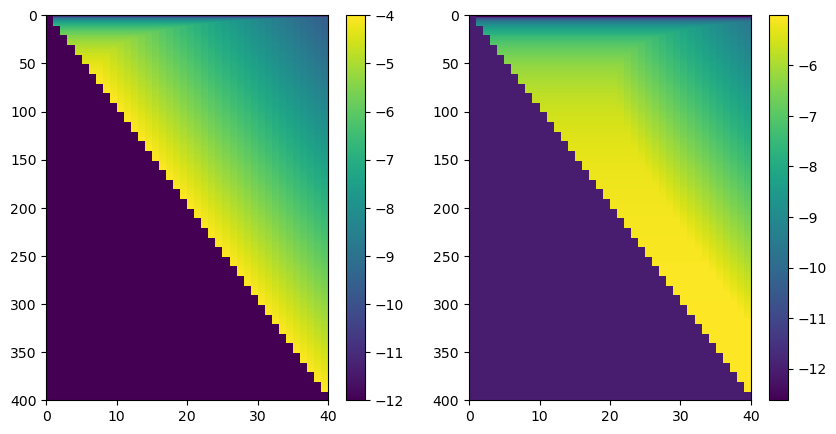

In [ ]:
for ii in range(40):
    for jj in range(400):
        kappa[jj, ii] = min(kappa_limit[jj], kappa0[jj, ii]) 
kappa = np.log10(kappa)
kappa[-zz > H] = -12
colors = axs[0].pcolormesh(kappa);
fig.colorbar(colors, ax=axs[0])

for ii in range(40):
    for jj in range(400):
        kappa[jj, ii] = min(kappa_limit2[jj], kappa0[jj, ii]) 
kappa = np.log10(kappa)
kappa[-zz > H] = -12
colors = axs[1].pcolormesh(kappa);
fig.colorbar(colors, ax=axs[1])
for ax in axs:
    ax.invert_yaxis();

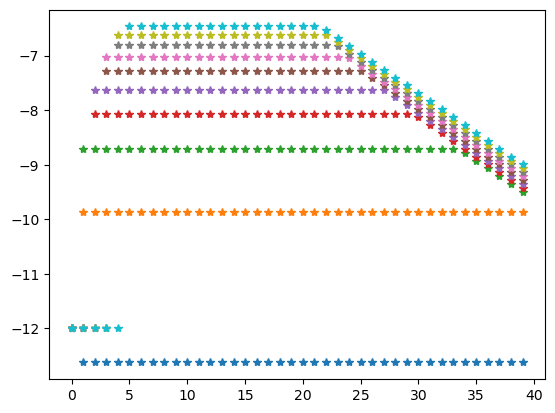

In [76]:
plt.plot(kappa[1], '*')
plt.plot(kappa[5], '*')
plt.plot(kappa[10], '*')
plt.plot(kappa[15], '*')
plt.plot(kappa[20], '*')
plt.plot(kappa[25], '*')
plt.plot(kappa[30], '*')
plt.plot(kappa[35], '*')
plt.plot(kappa[40], '*')
plt.plot(kappa[45], '*')


In [ ]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [ ]:
bathy.Bathymetry.plot()

In [ ]:
plt.pcolormesh(np.exp(-(H + zz)/ho)/(1-np.exp(-H/ho))*ho)